# Context and  Problem Statement

The data we have at hand is of passengers and their feedback regarding their flight experience. 

Each row is one passenger. Apart from the  feedback from the customers accross various attributes(15 in total) like food, online_support, cleanliness etc, we have data about the customers' age, loyalty to the airline, gender and class.

The target column is a binary variable which tells us if the customer is satisfied or neutral/dissatisfied

The task at hand is to analyze reasons for customers' satisfaction or dissatisfaction.

And finally, we build a model to predict customer satisfaction using all or some of the data we have

# Approach/ Steps - 
1. Data loading and preprocessing
2. Exploratory Data Analysis
3. Model building and evaluation
4. Model Tuning
5. Dimensionality Reduction

# Data loading and preprocessing

### 1. Import libraries

In [1]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")  # Not always recommended, but just so our notebook looks clean for this activity

### 2. Import the dataframes

In [4]:
df1 = pd.read_csv("Flight data_Train.csv")  # Read the data regarding customer attributes
df2 = pd.read_csv("Surveydata_Train.csv")   # Feedback data from customers

In [5]:
df1.head(2)

,ID,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
0,149965,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0.0
1,149966,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0.0


In [6]:
df1.shape, df2.shape

((90917, 9), (90917, 16))

In [7]:
df2.head(2)

,Id,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,198671,neutral or dissatisfied,poor,acceptable,acceptable,manageable,poor,need improvement,poor,poor,acceptable,acceptable,poor,need improvement,need improvement,poor
1,193378,satisfied,excellent,need improvement,excellent,Convinient,acceptable,excellent,acceptable,acceptable,good,acceptable,excellent,acceptable,excellent,acceptable


### 3. Join the two dataframes using the 'id' column as the primary key
- Rename the Id column of one dataframe so that there "id" column name becomes same

In [9]:
#Using pandas' Join method
df = df2.set_index("Id").join(df1.set_index("ID"))

print(df.shape)
df.head()  # the combined dataframe

(90917, 23)


,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Id,,,,,,,,,,,,,,,,,,,,,
198671,neutral or dissatisfied,poor,acceptable,acceptable,manageable,poor,need improvement,poor,poor,acceptable,...,need improvement,poor,Male,Loyal Customer,30,Business travel,Business,1354,11,8.0
193378,satisfied,excellent,need improvement,excellent,Convinient,acceptable,excellent,acceptable,acceptable,good,...,excellent,acceptable,Female,disloyal Customer,20,NaN,Business,1439,6,0.0
174522,satisfied,good,good,good,manageable,acceptable,excellent,excellent,need improvement,need improvement,...,need improvement,excellent,Female,NaN,55,Personal Travel,Eco Plus,976,4,0.0
191830,satisfied,good,good,good,manageable,poor,good,poor,poor,poor,...,acceptable,poor,Male,disloyal Customer,24,Business travel,Eco,2291,0,0.0
221497,satisfied,good,good,NaN,Convinient,good,good,good,good,good,...,good,good,Male,Loyal Customer,32,Business travel,Business,3974,0,0.0


### 4. Number of missing values in each of the columns

In [10]:
df.isnull().sum()

Satisfaction                            0
Seat_comfort                            0
Departure.Arrival.time_convenient    8244
Food_drink                           8181
Gate_location                           0
Inflightwifi_service                    0
Inflight_entertainment                  0
Online_support                          0
Ease_of_Onlinebooking                   0
Onboard_service                      7179
Leg_room_service                        0
Baggage_handling                        0
Checkin_service                         0
Cleanliness                             0
Online_boarding                         0
Gender                                  0
CustomerType                         9099
Age                                     0
TypeTravel                           9088
Class                                   0
Flight_Distance                         0
DepartureDelayin_Mins                   0
ArrivalDelayin_Mins                   284
dtype: int64

In [11]:
#percentage of missing values
df.isnull().sum()/df.shape[0]*100

Satisfaction                          0.000000
Seat_comfort                          0.000000
Departure.Arrival.time_convenient     9.067611
Food_drink                            8.998317
Gate_location                         0.000000
Inflightwifi_service                  0.000000
Inflight_entertainment                0.000000
Online_support                        0.000000
Ease_of_Onlinebooking                 0.000000
Onboard_service                       7.896213
Leg_room_service                      0.000000
Baggage_handling                      0.000000
Checkin_service                       0.000000
Cleanliness                           0.000000
Online_boarding                       0.000000
Gender                                0.000000
CustomerType                         10.008029
Age                                   0.000000
TypeTravel                            9.995930
Class                                 0.000000
Flight_Distance                       0.000000
DepartureDela

In [12]:
df['Departure.Arrival.time_convenient'].value_counts(dropna = False)

good                18840
excellent           17079
acceptable          14806
need improvement    14539
poor                13210
NaN                  8244
extremely poor       4199
Name: Departure.Arrival.time_convenient, dtype: int64

In [13]:
df1 = df.copy()
df1['Departure.Arrival.time_convenient']= df1['Departure.Arrival.time_convenient'].fillna('UKNNOWN')

<AxesSubplot:xlabel='Departure.Arrival.time_convenient', ylabel='count'>

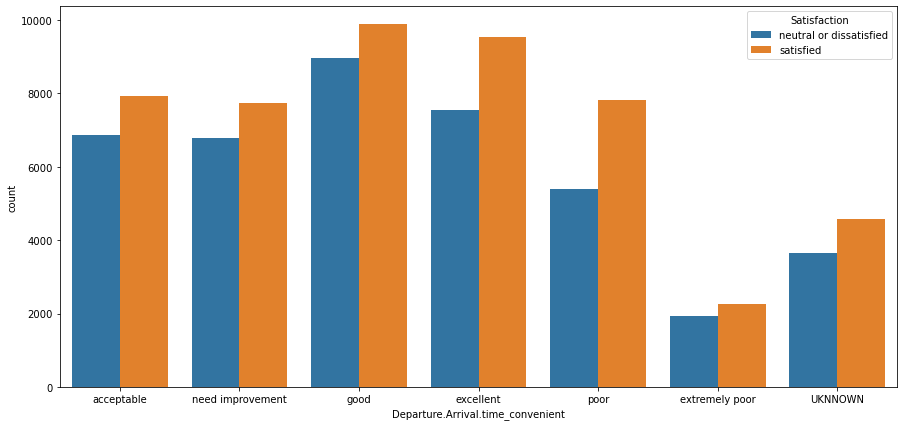

In [14]:
plt.figure(figsize = (15, 7))
sns.countplot(hue = 'Satisfaction', x = 'Departure.Arrival.time_convenient', data = df1)

### 5. Drop all the rows having atleast one missing values and check the shape of the dataframe before and after dropping the rows
- Fill null values in ArrivalDelayin_Mins with mean
- After that drop all the rows with null values

In [21]:
df['ArrivalDelayin_Mins'].isnull().sum()

284

In [22]:
# Since there are very less null values in the 'ArrivalDelayin_Mins' column, lets impute with mean
df.ArrivalDelayin_Mins.fillna(df.ArrivalDelayin_Mins.mean(), inplace = True)

In [23]:
df.ArrivalDelayin_Mins.isna().sum()

0

In [24]:
# Rest other missing values are filled with not_captured.
#It can be done in other way also or also can be dropped according to the problem and business context.
df.fillna("not_captured", inplace = True) 

In [25]:
print(df.shape)

(90917, 23)


In [26]:
df['ArrivalDelayin_Mins'].dtypes

dtype('float64')

<AxesSubplot:xlabel='ArrivalDelayin_Mins', ylabel='Density'>

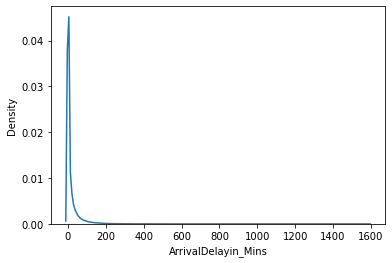

In [27]:
sns.kdeplot(df['ArrivalDelayin_Mins'])

# Exploratory Data Analysis

In [28]:
# independent features
X = df.drop(['Satisfaction'], axis=1)
y = df['Satisfaction']

In [29]:
num_cols = X.dtypes[X.dtypes != 'object'].index.tolist()
obj_cols = X.dtypes[df.dtypes == 'object'].index.tolist()

In [30]:
num_cols

['Age', 'Flight_Distance', 'DepartureDelayin_Mins', 'ArrivalDelayin_Mins']

In [31]:
obj_cols

['Seat_comfort',
 'Departure.Arrival.time_convenient',
 'Food_drink',
 'Gate_location',
 'Inflightwifi_service',
 'Inflight_entertainment',
 'Online_support',
 'Ease_of_Onlinebooking',
 'Onboard_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Cleanliness',
 'Online_boarding',
 'Gender',
 'CustomerType',
 'TypeTravel',
 'Class']

In [32]:
len(obj_cols)

18

In [33]:
#creating the big rectangle
def find_r_c(cols):

    size = len(cols)

    c = 3
    if len(cols)%c == 0:
        r = int(len(cols)/c)
    else:
        r = int(len(cols)/c)+1
    return r,c

In [34]:
# Custom function for univariate visualization of Numerical Variables -

def UVA_numerical(data, num_cols, graph_type): # check for continuity 

    '''
    Univariate_Analysis_numerical
    takes a group of variables (numerical) and plots distributions.
    '''
    r,c = find_r_c(num_cols)
    
    plt.rcParams["figure.figsize"] = [20, 5*r]
    plt.rcParams["figure.autolayout"] = True

    count = 1
#     plt.tight_layout()
    for i in range(len(num_cols)):
        plt.subplot(r,c,count)
        plt.subplots_adjust(hspace = 1)
        
        if graph_type == 'dist':       
            sns.distplot(df[num_cols[i]])
        elif graph_type == 'box':
            sns.boxplot(df[num_cols[i]])

        count += 1

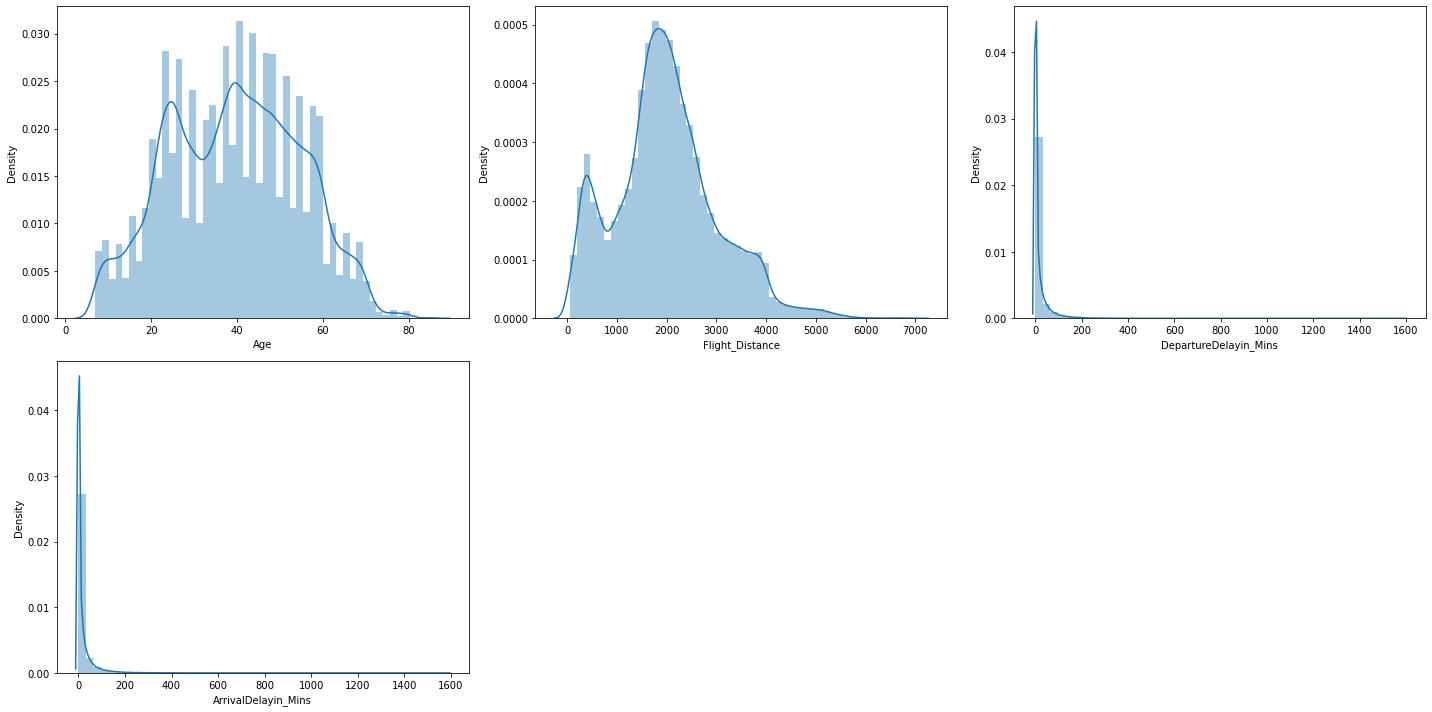

In [35]:
UVA_numerical(df, num_cols, 'dist')

In [156]:
cont_cols

['Age', 'Flight_Distance', 'DepartureDelayin_Mins', 'ArrivalDelayin_Mins']

In [157]:
print(cat_cols)
print(len(cat_cols))

['Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink', 'Gate_location', 'Inflightwifi_service', 'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking', 'Onboard_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender', 'CustomerType', 'TypeTravel', 'Class']
18


In [41]:
# Custom function for univariate visualization of Categorical Variables

def UVA_category(data, cat_cols): #cat_cols = obj_cols + disc_cols # for today we will tackle obj_cols 

    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print all the value_counts and barplot.
    '''
    r,c = find_r_c(cat_cols)
    
    if len(cat_cols) < 2:
        plt.rcParams["figure.figsize"] = (5, 5)  

        i = cat_cols[0]

        norm_count = data[i].value_counts(normalize = True)
        s = str(norm_count).split('names')[0]
        n_uni = data[i].nunique()
        sns.countplot(data[i])
        plt.xlabel('{}'.format(i), fontsize = 10)
        plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,s), size = 14)
        
    else:
        plt.rcParams["figure.figsize"] = (20, 50)    

        count = 1
        for i in cat_cols:
            norm_count = data[i].value_counts(normalize = True)
            s = str(norm_count).split('names')[0]
            n_uni = data[i].nunique()

            plt.subplot(r,c,count)
            plt.subplots_adjust(hspace = 0.5)
            sns.countplot(data[i])
            plt.xlabel('{}'.format(i), fontsize = 10)
            plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,s), size = 14)

            count += 1

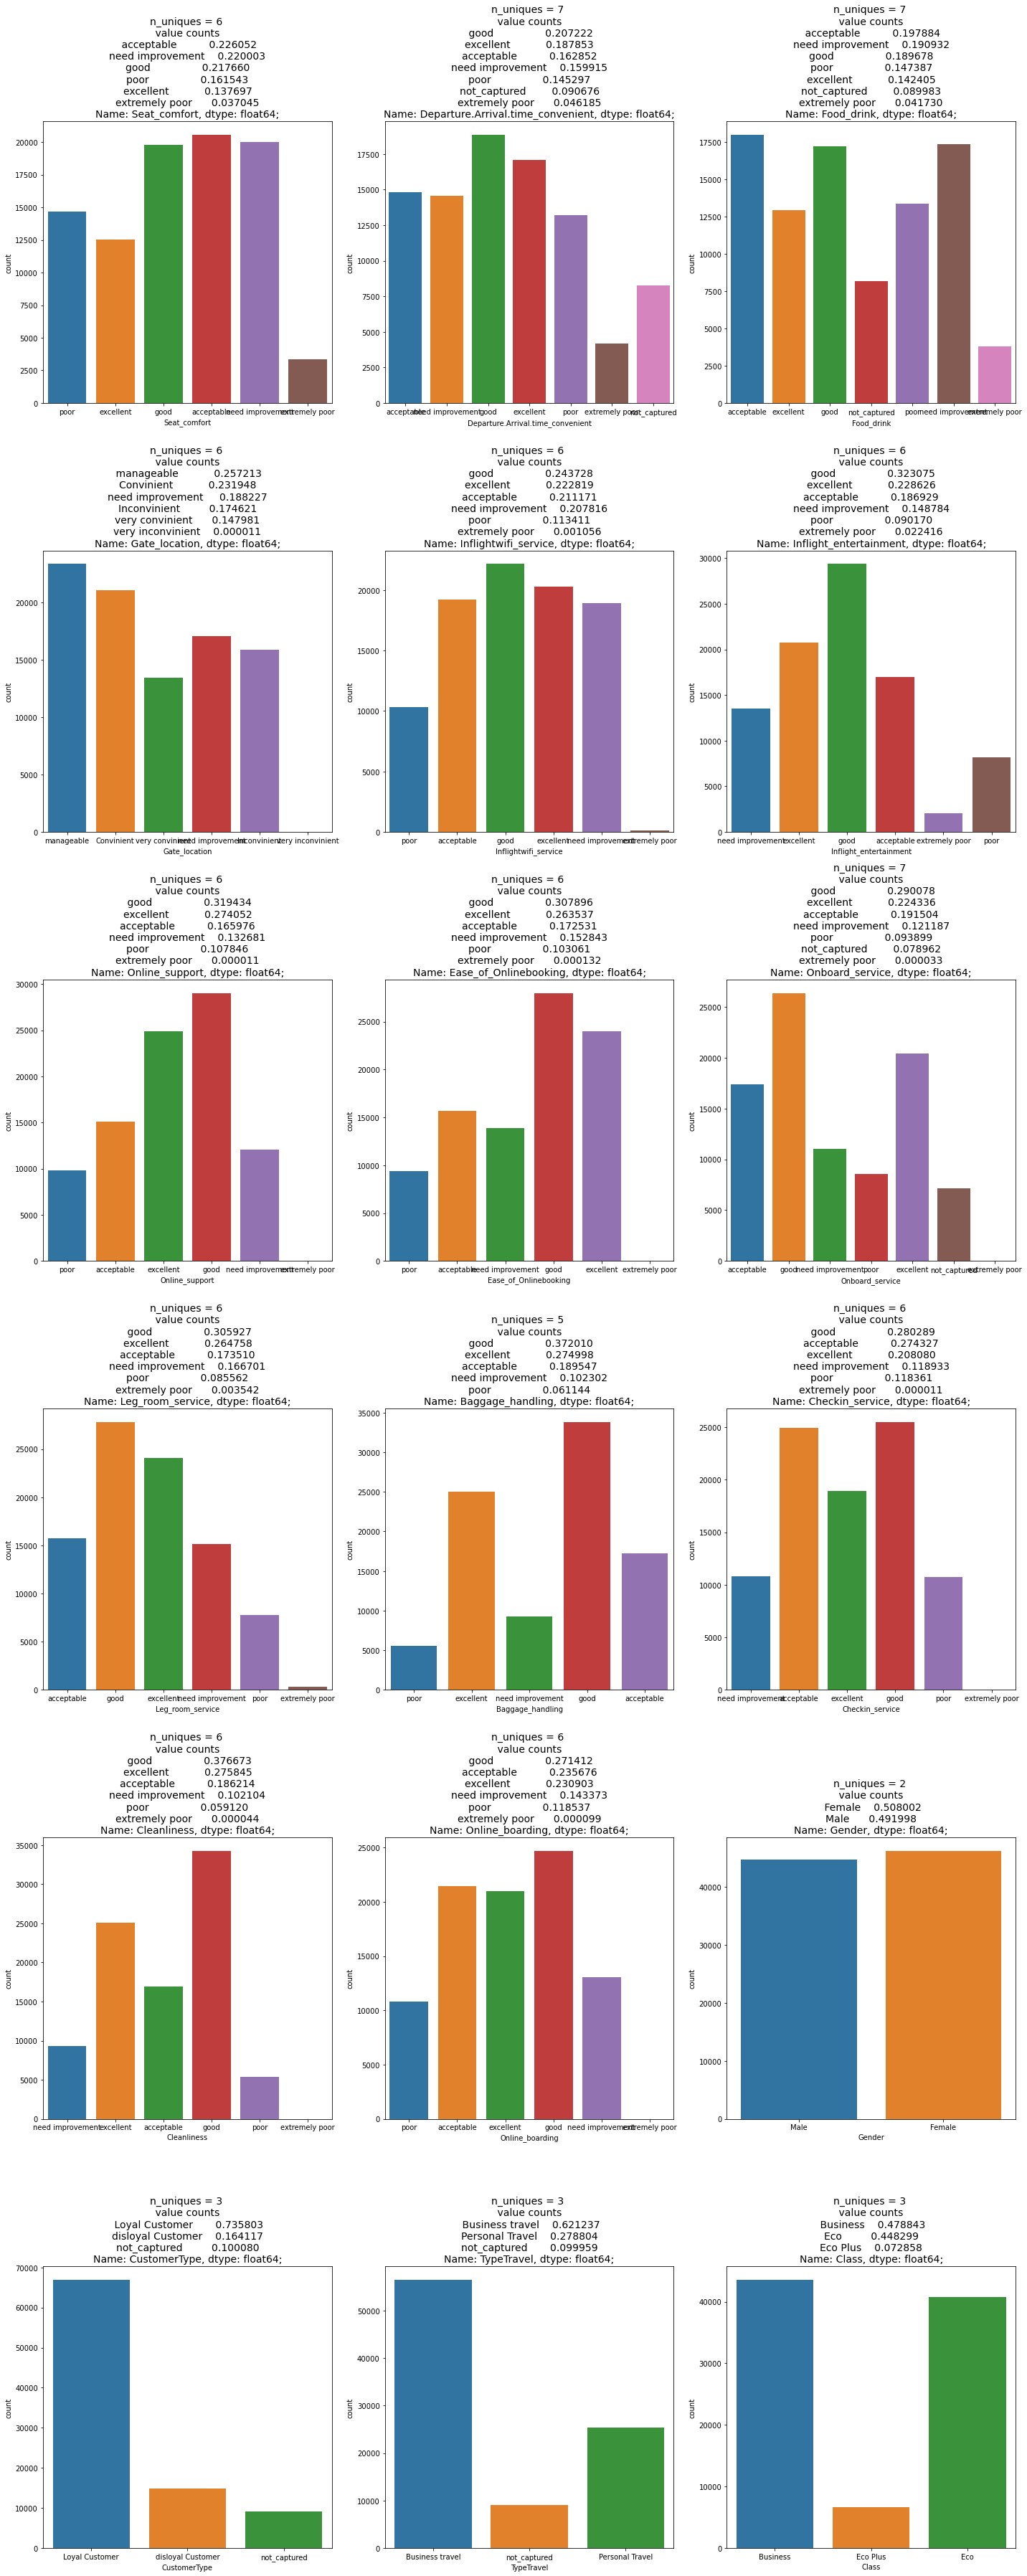

In [42]:
UVA_category(df, cat_cols)

In [43]:
def BVA_categorical_plot_simple(data, tar, cat_cols):
    '''
    take data and two categorical variables,
    calculates the chi2 significance between the two variables 
    and prints the result with countplot & CrossTab
    '''
    r,c = find_r_c(cat_cols)

    plt.rcParams["figure.figsize"] = (20, 5*r)    
    plt.subplots_adjust(hspace = 2)

    count = 1
    
    for i in cat_cols:
        
        plt.subplot(r,c,count)
        sns.countplot(x=i, hue=tar, data=data)
        f_obs = pd.crosstab(data[tar],data[i]).values
        chi, p, dof, expected = stats.chi2_contingency(f_obs)

        if p<0.05:
            sig = True
        else:
            sig = False
            
        s = pd.crosstab(df[i], df[tar],normalize='index').fillna(0).round(2) 
        
        plt.title("{} \n p-value = {}\n difference significant? = {}\n".format(s,round(p,4),sig))
        plt.xlabel(i)

        count += 1

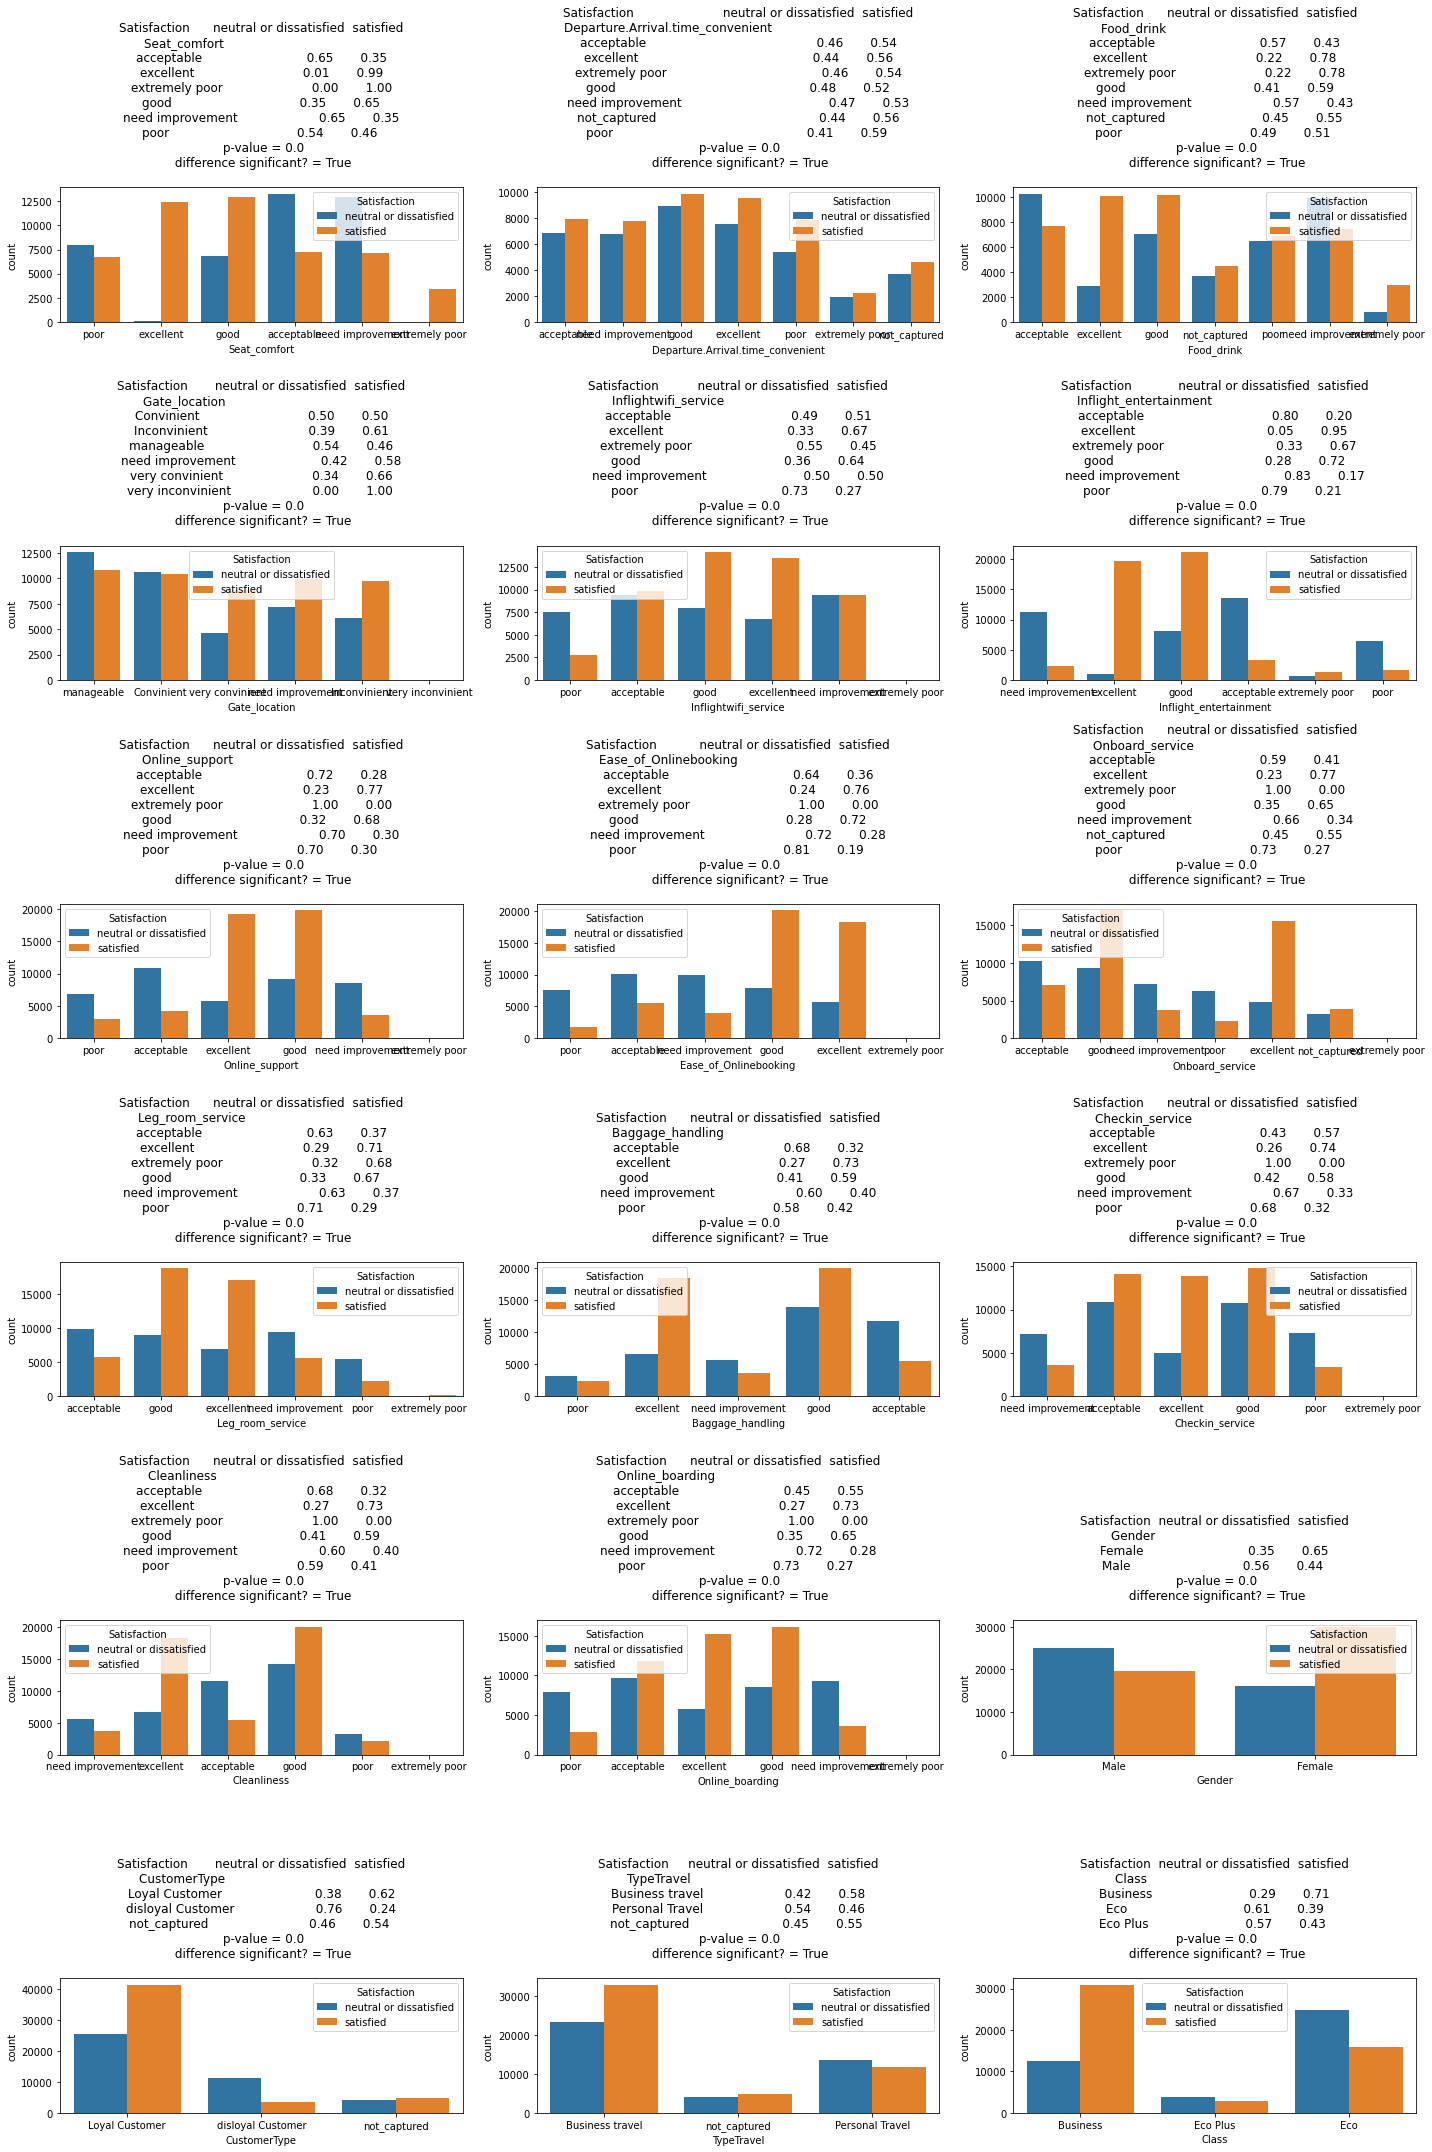

In [44]:
BVA_categorical_plot_simple(df, 'Satisfaction', cat_cols)

In [45]:
print(cont_cols)

['Age', 'Flight_Distance', 'DepartureDelayin_Mins', 'ArrivalDelayin_Mins']


In [46]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numerical_info(data, cont_cols):
    '''
    Univariate_Analysis_numeric
    takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

    Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
    '''

    r,c = find_r_c(cont_cols)
        
    plt.rcParams["figure.figsize"] = [22, 6*r]
    plt.rcParams["figure.autolayout"] = True
    plt.rcParams['axes.titlesize'] = 16

    count = 1
        
    #looping for each variable
    for i in cont_cols:
        
        # calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max()-data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()
        q1 = data[i].quantile(0.25)
        q3 = data[i].quantile(0.75)

        # calculating points of standard deviation
        points = [mean-st_dev, mean+st_dev]

        #Plotting the variable with every information
        plt.subplot(r,c,count)
        plt.subplots_adjust(hspace = 10)
        
        s = 100
        sns.kdeplot(data[i], shade=True)
        sns.lineplot(points, [0,0], color = 'black', label = "std_dev", lw=3)
        sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max", s = s)
        sns.scatterplot([mean], [0], color = 'red', label = "mean", s = s)
        sns.scatterplot([median], [0], color = 'blue', label = "median", s = s)
        sns.scatterplot([q1], [0], color = 'green', label = "Q1", s = s)
        sns.scatterplot([q3], [0], color = 'green', label = "Q3", s = s)

        plt.xlabel('{}'.format(i), fontsize = 22)
        plt.ylabel('density')
        
        t = 'std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}; \nQ1 = {}, Q3 = {}'
        plt.title(t.format((round(points[0],2),round(points[1],2)),round(kurt,2),round(skew,2),
                           (round(mini,2),round(maxi,2),round(ran,2)),round(mean,2),round(median,2), 
                           round(q1,2),round(q3,2)))
        count += 1

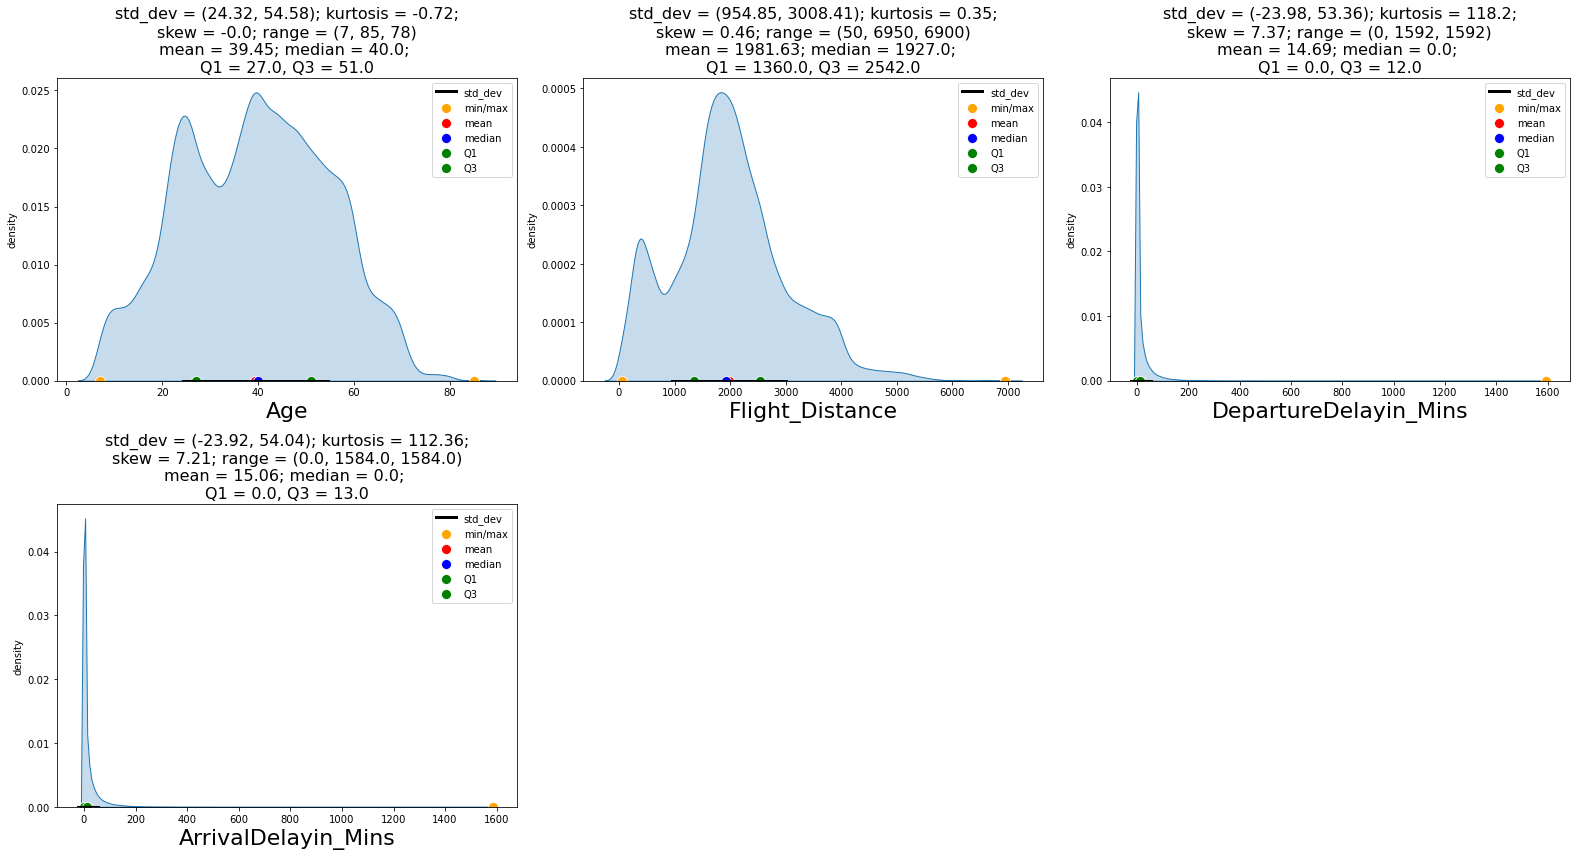

In [47]:
UVA_numerical_info(df,cont_cols)

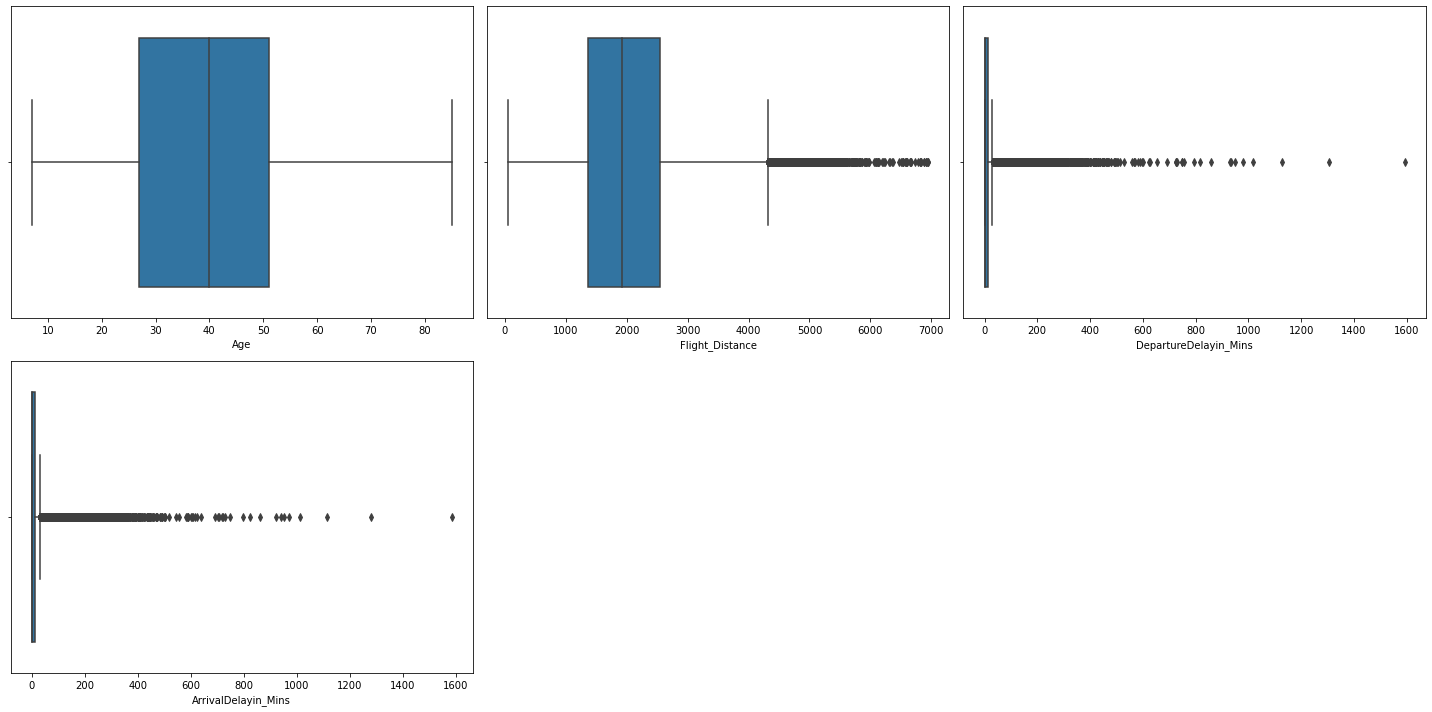

In [48]:
UVA_numerical(df, cont_cols, 'box')

In [49]:
def plot_barplot_cont_cols(df, cont_cols, target):
    
    r,c = find_r_c(cont_cols)

    plt.rcParams["figure.figsize"] = [5*c, 4*r]

    count = 1
    for i in range(len(cont_cols)):
        plt.subplot(r,c,count)
        sns.barplot(x=target, y=cont_cols[i], data = df) # estimator = np.median  #np.sum
        plt.xlabel('')
        count+=1

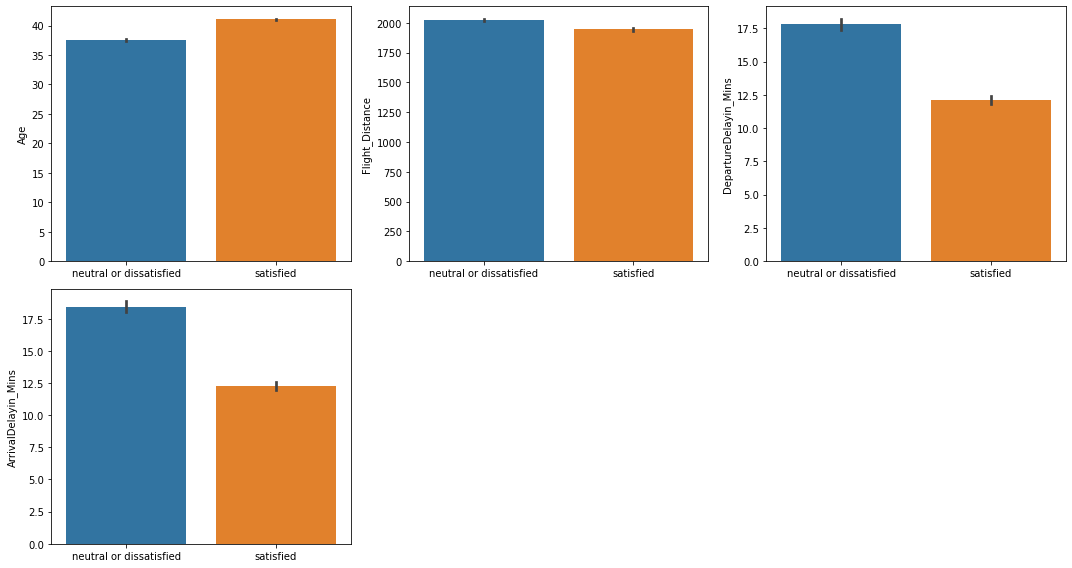

In [50]:
plot_barplot_cont_cols(df, cont_cols, 'Satisfaction')

In [51]:
def plot_distplot_bva(df, cont_cols, target, htest):
    
    r,c = find_r_c(cont_cols)

    plt.rcParams["figure.figsize"] = [5*c, 4*r]

    count = 1
    for i in cont_cols:
        plt.subplot(r,c,count)
        
        samples = []
        for j in df[target].unique():
            values_ = df.loc[df[target] == j, i].values
            sns.distplot(values_, hist=False) #, rug=True)
            samples.append(values_)
        
        if htest == 'anova':
            f, p = stats.f_oneway(samples[0], samples[1])
        elif htest == 'ttest':
            f, p = stats.ttest_ind(samples[0], samples[1])
            
        if p < 0.05:
            d = 'Difference is significant'
        else:
            d = 'Difference is NOT significant'
            
        plt.title('p-value = {}, stat ={} \n {}'.format(round(p,4), round(f,2), d), size = 12)
        plt.xlabel(i, size = 14)
    
        count+=1

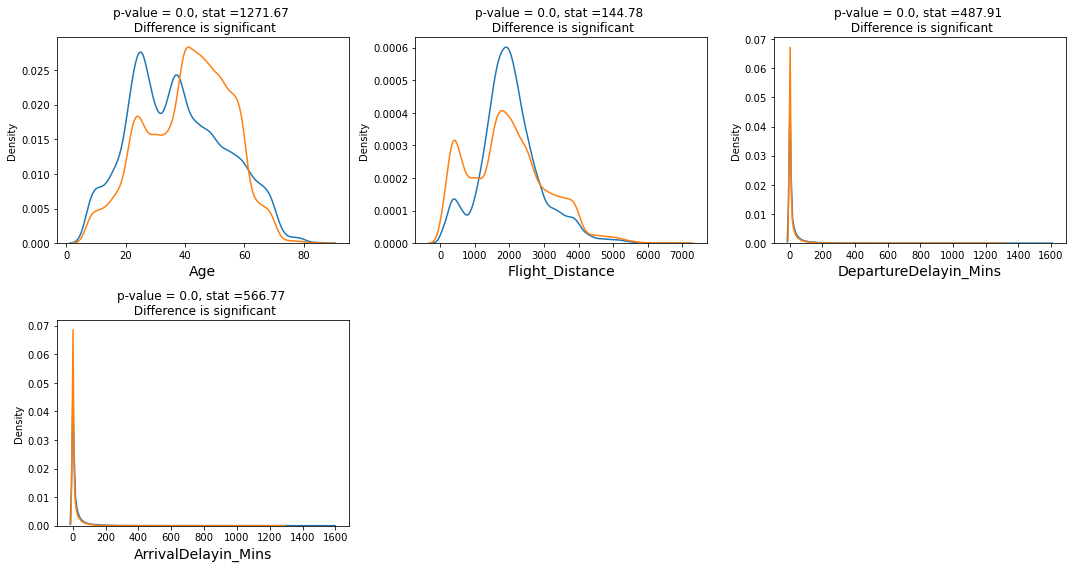

In [52]:
plot_distplot_bva(df, cont_cols, 'Satisfaction','anova')

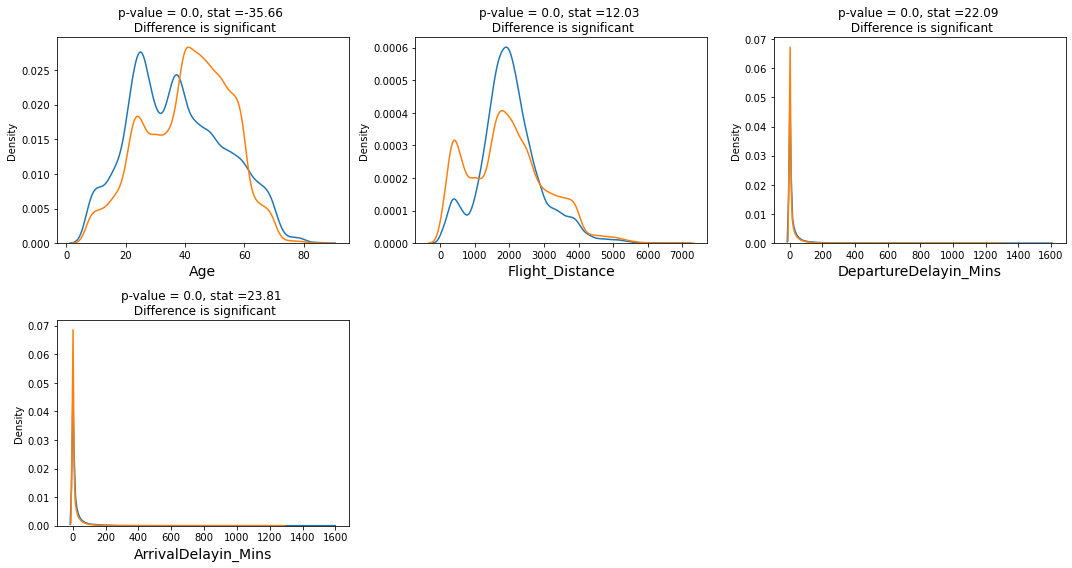

In [53]:
plot_distplot_bva(df, cont_cols, 'Satisfaction','ttest')

In [54]:
cont_cols

['Age', 'Flight_Distance', 'DepartureDelayin_Mins', 'ArrivalDelayin_Mins']

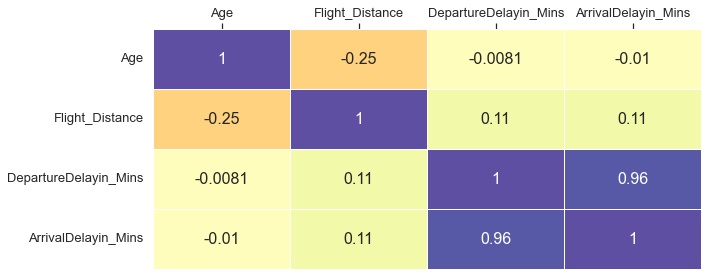

In [57]:
sns.set(rc={'figure.figsize':(10,4)})
ax = sns.heatmap(df[cont_cols].corr(),
            annot=True, annot_kws={"size":16},
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="Spectral")
ax.xaxis.tick_top()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(13)

plt.show()

### 6. Print correlation

In [58]:
cor = df.corr() # It will show correlation of only numerical variables here.

In [59]:
cor[cor > .90]

,Age,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Age,1.0,NaN,NaN,NaN
Flight_Distance,NaN,1.0,NaN,NaN
DepartureDelayin_Mins,NaN,NaN,1.00000,0.96112
ArrivalDelayin_Mins,NaN,NaN,0.96112,1.00000


In [60]:
to_drop = ['DepartureDelayin_Mins']

- There is just one obvious correlation that we can see that is between arrival delay and departure delay

### Feedback columns
Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink', 'Gate_location',
'Inflightwifi_service', 'Inflight_entertainment', 'Online_support',
'Ease_of_Onlinebooking', 'Onboard_service', 'Leg_room_service',
'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding'

### 7. Manually encoding these variables(printed above) such that they follow an order based on the meaning. 

In [61]:
# Manual label encoding
df.replace({'extremely poor' : 0, 'poor' : 1, 'need improvement' : 2, 'acceptable' : 3, 
            'good' : 4, 'excellent' : 5, 'not_captured' : 2}, inplace = True)  

df.replace({'very inconvinient' : 0, 'Inconvinient' : 1, 'need improvement' : 2, 'manageable' : 3,
            'Convinient' : 4, 'very convinient' : 5}, inplace = True)

In [62]:
df['Departure.Arrival.time_convenient'].value_counts()

2    22783
4    18840
5    17079
3    14806
1    13210
0     4199
Name: Departure.Arrival.time_convenient, dtype: int64

### 8. Display countplot of every feedback attribute with respect to Customer Satisfaction. 

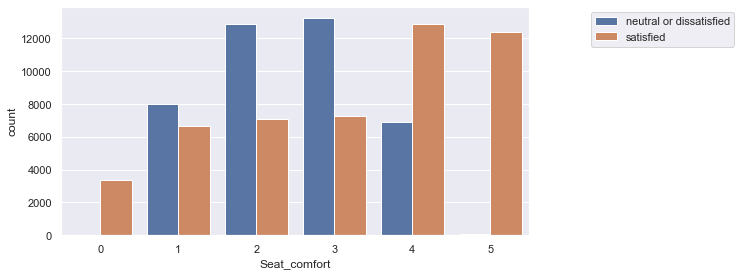

In [63]:
# We can use seaborn's countplot to plot a stacked baatchart
sns.countplot(df.Seat_comfort, hue = df.Satisfaction) 
plt.legend(loc = 'upper right', bbox_to_anchor=(1.45, 1))   # to place the legend in a 'good' position

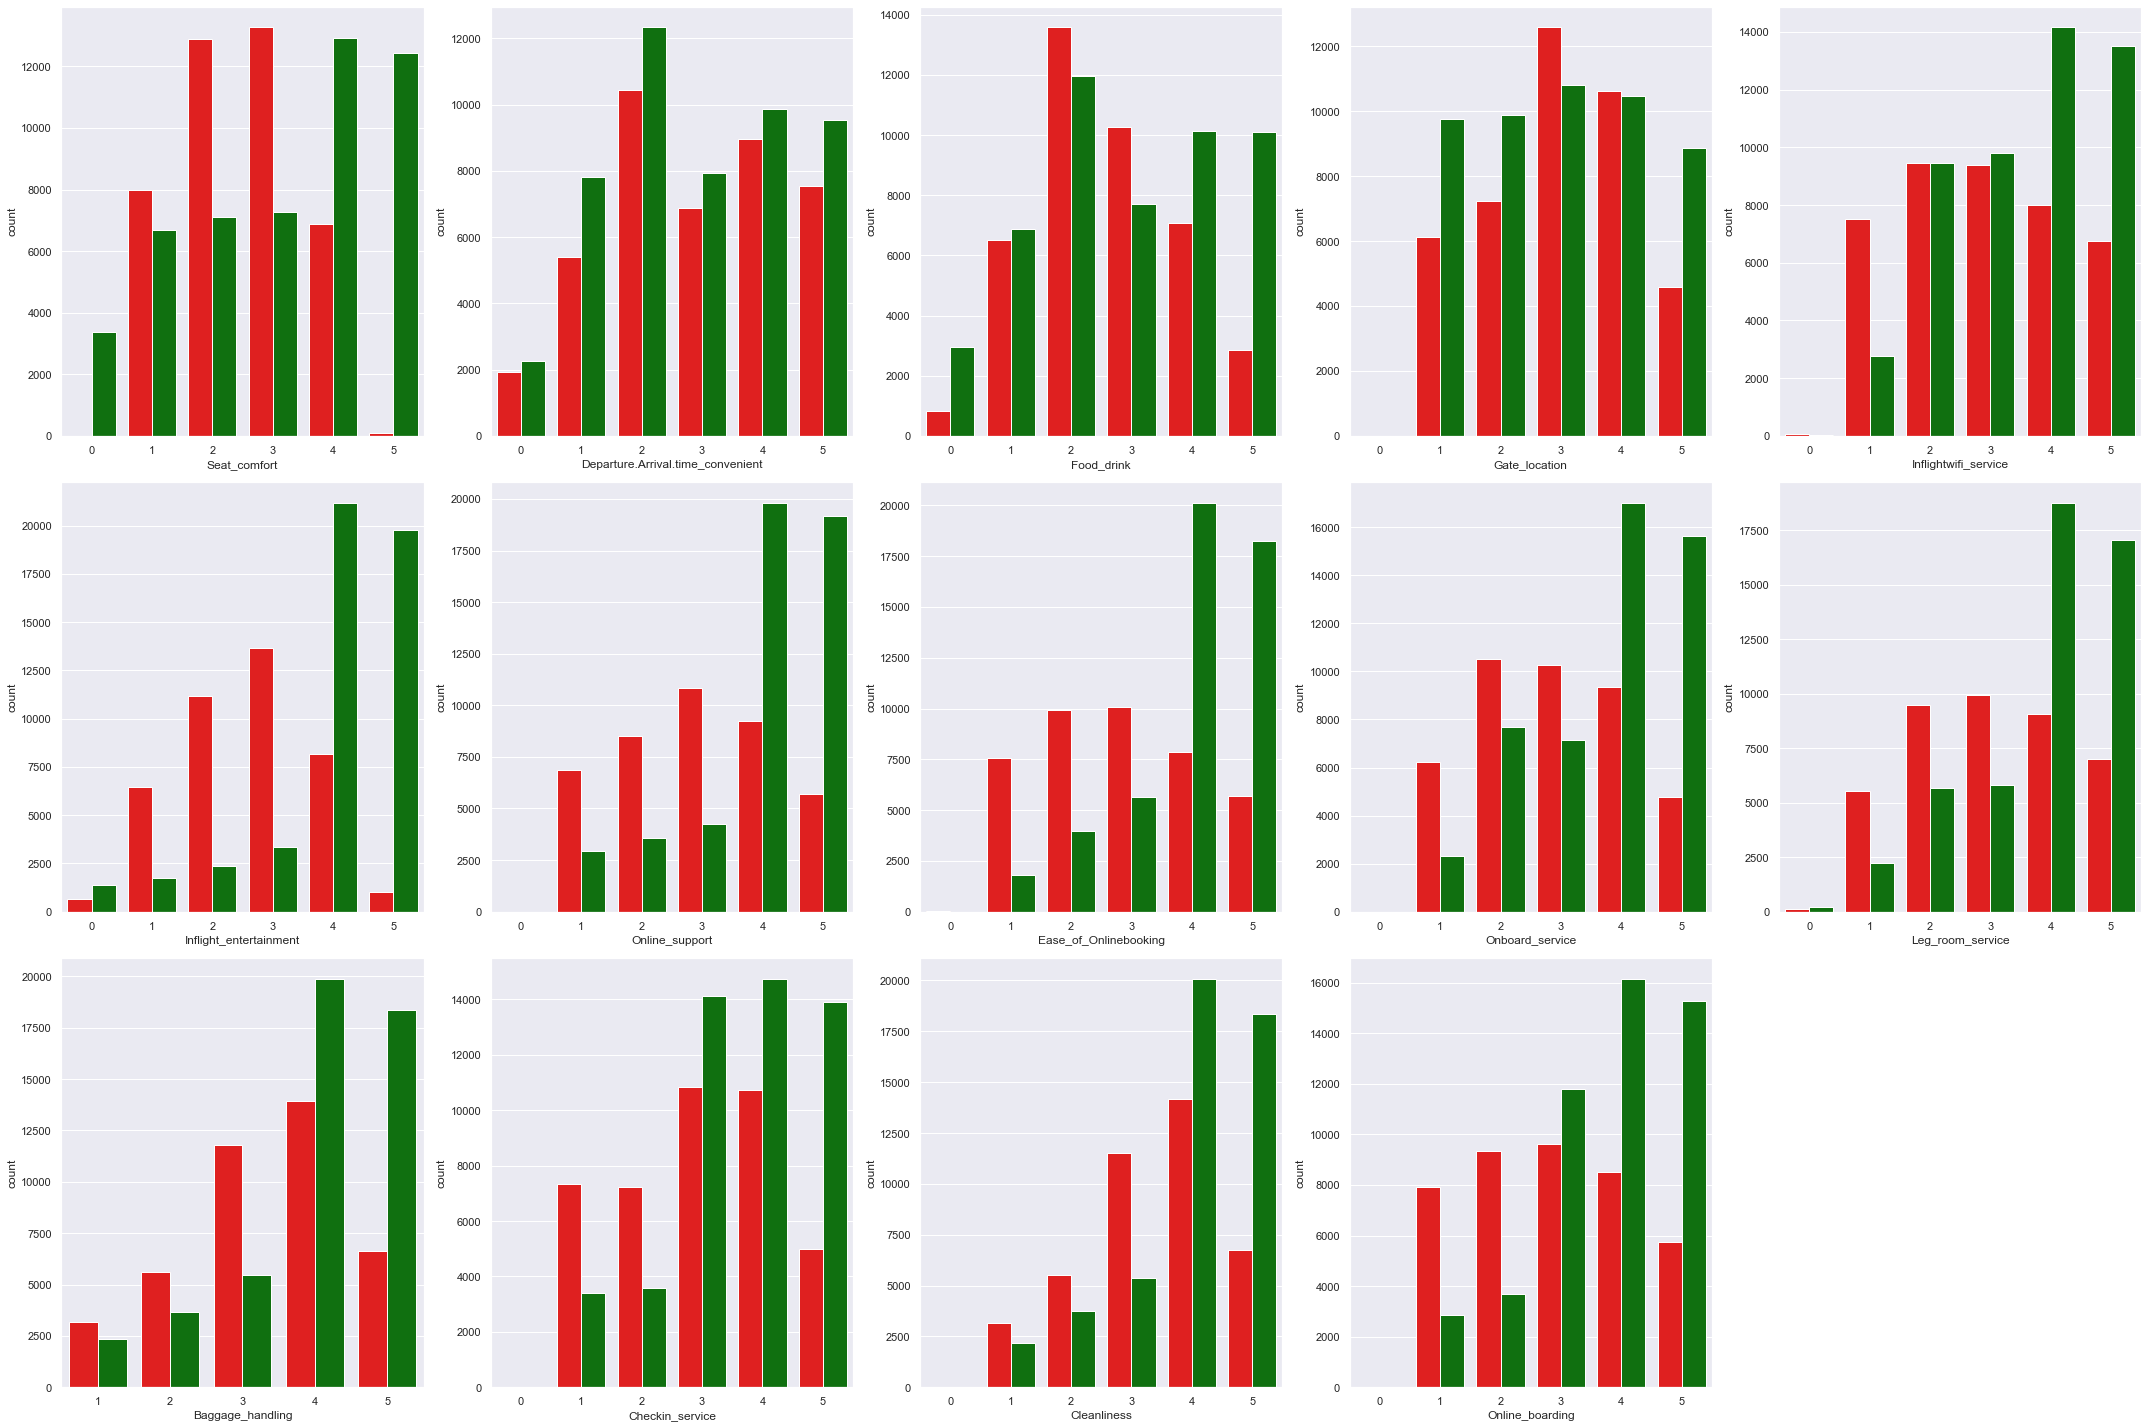

In [64]:
# Since there are a lot of columns that we want to plot, we can put all of them in one plot by using subplot()
# Additionally, since there are a lot of subplots that need to be plotted, we can use a for loop

plt.figure(figsize= (30,20))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
feedback = [ 'Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink',
           'Gate_location', 'Inflightwifi_service','Inflight_entertainment',
           'Online_support', 'Ease_of_Onlinebooking', 'Onboard_service',
           'Leg_room_service', 'Baggage_handling','Checkin_service', 'Cleanliness', 'Online_boarding']

for i in feedback:
    plt.subplot(3, 5, pos)
    sns.countplot(df[i], hue = df.Satisfaction,
                  palette = {'satisfied':'green','neutral or dissatisfied': 'red'})
    plt.legend().remove()  # Remove legend to make the entire plot look 'good'
    pos += 1  # to plot over the grid one by one   

### 9. Insights from above plots

**Green and orange bars are counts of satisfied and dissatisfied customers respectively. We want to look for areas where there is a visually significant difference between the length of the stacked bars**

- From the plots above,
    - Seating comfort can cause high levels of satisfaction to customers. Hardly any people who rated highly for seat_comfort were dissatisfied
    - A similar case with respect to inflight_entertainment. In this case, having less entertainment seems to have caused far more dissatisfaction compared to bad seating.
    - Difference is observed in ease_of_online_booking quiet evidently

### 10. Print the average feedback score
- When Satisfaction columns equals 'satisfied'
- When Satisfaction columns is not equal to 'satisfied'

In [65]:
Feedback_cols = ['Seat_comfort', 'Departure.Arrival.time_convenient',
                 'Food_drink', 'Gate_location', 'Inflightwifi_service',
                 'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking', 
                 'Onboard_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service',
                 'Cleanliness', 'Online_boarding']

In [66]:
df.groupby('Satisfaction').mean() # Average rating of individual feedback attributes across satisfaction levels

,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Age,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Satisfaction,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,2.469239,2.928127,2.603606,3.007848,2.923219,2.613058,2.962071,2.858563,2.900209,3.053164,3.368209,2.970673,3.381159,2.873530,37.493221,2026.647512,17.793177,18.432402
satisfied,3.144511,2.882559,2.914210,2.975985,3.523121,4.021543,3.979864,3.985953,3.723297,3.845803,3.969695,3.646852,3.978115,3.748598,41.063222,1944.396194,12.117220,12.268821


### 11. Insights from the above values

- Observe the Exreme values (lower side for 'dissatisfaction' and higher side for 'satisfaction')
- Bad seats are a strong cause for customer dissatisfication
- Time convenience doesn't seem to be that big of a deal
- Dissatisfied customers had some bad experiences with food but average food seems to satisfy most people
- Gate location is totally irrelevant
- Wifi is quiet a factor. On an average, having good wifi yeilded customer satisfaction
- Easy online booking facility seems to be very important for customer satisfaction
- In flight entertainment seems to be a deal breaker

### 12. Achieve the following
- Print the number of people who are more than just satisfied with the "Inflight_entertainment" and yet were dissatisfied overall
- Print the number of people who are more than just satisfied with the "Inflight_entertainment" and were satisfied overall

In [67]:
df.Inflight_entertainment.value_counts()

4    29373
5    20786
3    16995
2    13527
1     8198
0     2038
Name: Inflight_entertainment, dtype: int64

In [68]:
# Number of people who got entertained well but were dissatisfied in the end
entertained_and_dissatisfied = df[(df.Inflight_entertainment > 3) & (df.Satisfaction != 'satisfied')]
print(100 * entertained_and_dissatisfied.shape[0]/df.shape[0], 'percent')

10.11581992366664 percent


In [69]:
# Number of customers who got entertained and were satisfied with the flight
entertained_and_satisfied = df[(df.Inflight_entertainment > 3) & (df.Satisfaction == 'satisfied')]
print(100 * entertained_and_satisfied.shape[0]/df.shape[0], 'percent')

45.054280277615845 percent


### 13. Creating a new column which is the mean of 'Ease_of_Onlinebooking', 'Online_boarding', 'Online_support' and name it "avg_feedback_of_online_services". 

DIY : If online services has a bad ratings then what is the average ratings of other feedback attributes? 
And how does it impact Final Satisfaction of customers?

In [70]:
online_df = df.loc[:, ['Ease_of_Onlinebooking', 'Online_boarding', 'Online_support']]
online_df['avg_feedback_of_online_services'] = online_df.mean(axis = 1)

online_df['avg_feedback_of_online_services'].value_counts()

4.000000    18368
3.000000    11888
5.000000    11047
2.000000     9124
4.333333     9039
3.666667     6470
1.000000     6278
4.666667     5871
3.333333     4462
2.666667     3593
2.333333     3176
1.666667     1180
1.333333      419
0.666667        2
Name: avg_feedback_of_online_services, dtype: int64

**A lot of things had to go well to satisfy the customers when the only services had a bad rating**

# Model building and evaluation

### 14. Encoding the columns "Gender", "CustomerType", "TypeTravel", "Class", "Satisfaction" 

In [71]:
# Number of classes in each of the categorical attributes
for i in df.columns:
    if df[i].dtype == 'O':
        print(i, '->', len(df[i].value_counts()))

Satisfaction -> 2
Gender -> 2
CustomerType -> 3
TypeTravel -> 3
Class -> 3


In [72]:
df.Class.value_counts()

Business    43535
Eco         40758
Eco Plus     6624
Name: Class, dtype: int64

In [73]:
#Manuanl Encoding
df.replace({'Loyal Customer' : 1, 'disloyal Customer' : 0,
               'Business travel' : 1, 'Personal Travel' : 0,
              'Female' : 0, 'Male' : 1,
               'satisfied' : 1, 'neutral or dissatisfied' : 0, 'Eco Plus': 0 , 'Eco': 1, 'Business': 2}, inplace = True)

In [74]:
#onehotencoding
df_coded = pd.get_dummies(df)

In [75]:
df_coded.columns

Index(['Satisfaction', 'Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender',
       'CustomerType', 'Age', 'TypeTravel', 'Class', 'Flight_Distance',
       'DepartureDelayin_Mins', 'ArrivalDelayin_Mins'],
      dtype='object')

In [76]:
df_coded.head()

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Id,,,,,,,,,,,,,,,,,,,,,
198671,0,1,3,3,3,1,2,1,1,3,...,2,1,1,1,30,1,2,1354,11,8.0
193378,1,5,2,5,4,3,5,3,3,4,...,5,3,0,0,20,2,2,1439,6,0.0
174522,1,4,4,4,3,3,5,5,2,2,...,2,5,0,2,55,0,0,976,4,0.0
191830,1,4,4,4,3,1,4,1,1,1,...,3,1,1,0,24,1,1,2291,0,0.0
221497,1,4,4,2,4,4,4,4,4,4,...,4,4,1,1,32,1,2,3974,0,0.0


# Scaling

In [77]:
df_coded.columns

Index(['Satisfaction', 'Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender',
       'CustomerType', 'Age', 'TypeTravel', 'Class', 'Flight_Distance',
       'DepartureDelayin_Mins', 'ArrivalDelayin_Mins'],
      dtype='object')

In [78]:
#Here we are going to use StandardScaler to scale our data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#What all columns to scale? I have preferred all columns except onehotencoded columns and target columns as
#scaling of target feature will not change anything as they already have values like 0 and 1 only.
#You may only scale numerical features and leave categorical features as required according to business problem need and results.
cols_to_scale = ['Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Age', 'Flight_Distance','DepartureDelayin_Mins', 'ArrivalDelayin_Mins']

df_coded[cols_to_scale] = scaler.fit_transform(df_coded[cols_to_scale].to_numpy())

In [79]:
df_coded.describe()

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
count,90917.000000,9.091700e+04,9.091700e+04,9.091700e+04,9.091700e+04,9.091700e+04,9.091700e+04,9.091700e+04,9.091700e+04,9.091700e+04,...,9.091700e+04,9.091700e+04,90917.000000,90917.000000,9.091700e+04,90917.000000,90917.000000,9.091700e+04,9.091700e+04,9.091700e+04
mean,0.547323,-6.216541e-16,1.133241e-15,-6.731566e-16,-1.286394e-16,4.749572e-16,8.654207e-16,7.585582e-16,-1.460263e-15,2.901573e-16,...,5.131263e-16,-1.366151e-15,0.491998,0.935964,-6.534407e-17,0.821156,1.405986,7.954622e-17,9.809203e-16,-1.623169e-15
std,0.497758,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,1.000005e+00,0.499939,0.509999,1.000005e+00,0.588882,0.621997,1.000005e+00,1.000005e+00,1.000005e+00
min,0.000000,-2.037086e+00,-1.958795e+00,-1.984146e+00,-2.286429e+00,-2.463102e+00,-2.521293e+00,-2.690907e+00,-2.664014e+00,-2.616084e+00,...,-3.229837e+00,-2.579441e+00,0.000000,0.000000,-2.144599e+00,0.000000,0.000000,-1.881260e+00,-3.798023e-01,-3.863514e-01
25%,0.000000,-6.019276e-01,-6.093847e-01,-5.534125e-01,-7.572541e-01,-9.480736e-01,-1.031147e+00,-3.969552e-01,-1.131038e+00,-1.054571e+00,...,-6.166210e-01,-1.040613e+00,0.000000,1.000000,-8.226969e-01,0.000000,1.000000,-6.054198e-01,-3.798023e-01,-3.863514e-01
50%,1.000000,1.156515e-01,6.532063e-02,1.619542e-01,7.333284e-03,-1.905596e-01,4.589988e-01,3.676953e-01,4.019391e-01,5.069417e-01,...,2.544511e-01,4.982145e-01,0.000000,1.000000,3.653962e-02,1.000000,1.000000,-5.320492e-02,-3.798023e-01,-3.863514e-01
75%,1.000000,8.332305e-01,7.400259e-01,8.773210e-01,7.719207e-01,5.669545e-01,4.589988e-01,1.132346e+00,1.168428e+00,5.069417e-01,...,1.125523e+00,4.982145e-01,1.000000,1.000000,7.635859e-01,1.000000,2.000000,5.457583e-01,-6.947658e-02,-5.282384e-02
max,1.000000,1.550810e+00,1.414731e+00,1.592688e+00,1.536508e+00,1.324469e+00,1.204072e+00,1.132346e+00,1.168428e+00,1.287698e+00,...,1.125523e+00,1.267628e+00,1.000000,2.000000,3.010820e+00,2.000000,2.000000,4.838815e+00,4.079008e+01,4.025270e+01


In [80]:
df_coded.head()

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Id,,,,,,,,,,,,,,,,,,,,,
198671,0,-1.319507,0.065321,0.161954,0.007333,-1.705588,-1.031147,-1.926256,-1.897526,-0.273815,...,-1.487693,-1.810027,1,1,-0.624412,1,2,-0.611263,-0.095337,-0.181104
193378,1,1.550810,-0.609385,1.592688,0.771921,-0.190560,1.204072,-0.396955,-0.364549,0.506942,...,1.125523,-0.271199,0,0,-1.285363,2,2,-0.528480,-0.224639,-0.386351
174522,1,0.833231,0.740026,0.877321,0.007333,-0.190560,1.204072,1.132346,-1.131038,-1.054571,...,-1.487693,1.267628,0,2,1.027966,0,0,-0.979407,-0.276360,-0.386351
191830,1,0.833231,0.740026,0.877321,0.007333,-1.705588,0.458999,-1.926256,-1.897526,-1.835328,...,-0.616621,-1.810027,1,0,-1.020982,1,1,0.301303,-0.379802,-0.386351
221497,1,0.833231,0.740026,-0.553413,0.771921,0.566954,0.458999,0.367695,0.401939,0.506942,...,0.254451,0.498215,1,1,-0.492221,1,2,1.940417,-0.379802,-0.386351


In [81]:
df = df_coded

### 15. Seperating dependent and Independent columns

In [83]:
X = df.drop(columns= ['Satisfaction', 'DepartureDelayin_Mins'])  # Seperating the target and the rest
y = df.Satisfaction

In [84]:
df['Satisfaction'].value_counts(normalize = True)

1    0.547323
0    0.452677
Name: Satisfaction, dtype: float64

### 16. Creating train and test datasets

In [87]:
from sklearn.model_selection import train_test_split # Splitting the data for training and testing out model

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1, stratify = y)

In [88]:
y_train.value_counts(normalize = True)

1    0.547318
0    0.452682
Name: Satisfaction, dtype: float64

In [89]:
y_test.value_counts(normalize = True)

1    0.547338
0    0.452662
Name: Satisfaction, dtype: float64

In [90]:
X_train.dtypes

Seat_comfort                         float64
Departure.Arrival.time_convenient    float64
Food_drink                           float64
Gate_location                        float64
Inflightwifi_service                 float64
Inflight_entertainment               float64
Online_support                       float64
Ease_of_Onlinebooking                float64
Onboard_service                      float64
Leg_room_service                     float64
Baggage_handling                     float64
Checkin_service                      float64
Cleanliness                          float64
Online_boarding                      float64
Gender                                 int64
CustomerType                           int64
Age                                  float64
TypeTravel                             int64
Class                                  int64
Flight_Distance                      float64
ArrivalDelayin_Mins                  float64
dtype: object

In [91]:
X_train.shape

(68187, 21)

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

### 17. Print accuracy
- Print accuracy on test data using below models
- Logistic regression model trained using all the attributes
- Logistic regression model trained using only the feedback columns
- K Nearest Neighbours model trained using all the attributes
- Decision tree model trained using all the attributes
- Support Vector model trained using all the attributes
- Guassian Naive Bayes model trained using all the attributes
- Bernolli Naive Bayes model trained using all the attributes
- Random forest model trained using all the attributes

Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression #importing logistic regression

lr = LogisticRegression()

lr.fit(X_train, y_train)

pred = lr.predict(X_test)  # Predictions from logistic regression
score1 = lr.score(X_test, y_test)
score1

0.8276726792784865

In [94]:
lr.score(X_train, y_train)

0.8239107161189083

Predicting customer satisfaction solely based on the feedback

In [96]:
#Logistic Regression with only feedback columns
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,feedback], y, random_state = 1, stratify = y)

lr = LogisticRegression()

lr.fit(X_train, y_train)

pred = lr.predict(X_test)

score2 = lr.score(X_test, y_test)

print(f'Number of features used = {len(X_train.columns)}')
print(f'Accuracy in predicting customer satisfaction solely based on the feedback = {score2}')

Number of features used = 14
Accuracy in predicting customer satisfaction solely based on the feedback = 0.8048394192696876


In [98]:
k_odd = [i for i in n if i%2 != 0 ]
k_odd

[3, 5, 7, 9, 11, 13, 15, 17, 19]

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [100]:
scores = []
for i in k_odd:
    knn = KNeighborsClassifier(n_neighbors = i) 
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    s = accuracy_score(y_test, y_pred)
    scores.append(s)
k = k_odd[scores.index(max(scores))]
clf = KNeighborsClassifier(n_neighbors = k)

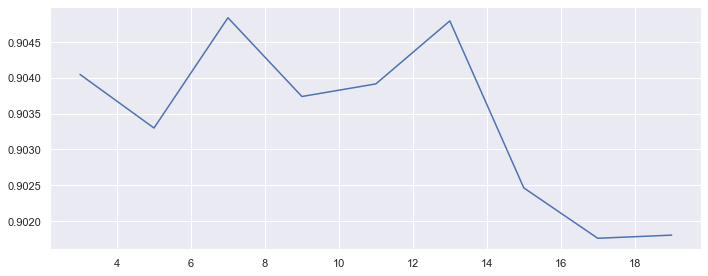

In [101]:
plt.plot(k_odd, scores)

In [102]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [103]:
clf.score(X_train, y_train)

0.9278894803994896

In [104]:
clf.score(X_test, y_test)

0.9048394192696876

Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

score3 = dt.score(X_test, y_test)
pred = dt.predict(X_test)

print(f"Decision tree acccuracy score: {score3}")

Decision tree acccuracy score: 0.9189617245930488


In [107]:
dt.score(X_train, y_train)

0.9973015384164137

In [108]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

score4 = svc.score(X_test, y_test)
pred = svc.predict(X_test)

print(f"SVM acccuracy score: {score4}")

SVM acccuracy score: 0.9245050593928729


In [109]:
svc.score(X_train, y_train)

0.92963468109757

In [110]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

score5 = gnb.score(X_test, y_test)
pred = gnb.predict(X_test)

print(f"GNB acccuracy score: {score5}")

GNB acccuracy score: 0.7912890453145622


In [111]:
gnb.score(X_train, y_train)

0.7883907489697449

In [112]:
bnb = BernoulliNB()

bnb.fit(X_train, y_train)

score7 = bnb.score(X_test, y_test)
pred = bnb.predict(X_test)

print(f"BNB acccuracy score: {score7}")

BNB acccuracy score: 0.7728112626484822


In [113]:
bnb.score(X_train, y_train)

0.7663484241864285

Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

score4_ = rf.score(X_test, y_test)

print(f'Random Forest accuracy score = {score4_}')

Random Forest accuracy score = 0.9405631324241092


In [115]:
rf.score(X_train, y_train)

0.9973015384164137

In [117]:
df.shape

(90917, 23)

# Model Tuning with Grid Search
- Decision Tree model
- Logistic Regression model
- Random Forest Model

In [119]:
dt = DecisionTreeClassifier()
params = {'criterion': ['gini', 'entropy'], 'max_depth':[10, 13, 17, 19]} # min_samples_split :[1:40]

grid = GridSearchCV(estimator = dt, param_grid= params, cv = 4) #scoring can be changed using metrics.make_scorer
grid.fit(X_train, y_train)

clf_new  = grid.best_estimator_ #best_score_

In [120]:
clf_new

DecisionTreeClassifier(criterion='entropy', max_depth=17)

In [121]:
clf_new.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=17)

In [122]:
clf_new.score(X_train, y_train)

0.9639960696320413

In [123]:
clf_new.score(X_test, y_test)

0.9236251649802024

In [125]:
lr = LogisticRegression()
params = {'penalty': ['l2', 'elasticnet'], 'C':[0.5, 1, 10, 100], 'solver':['saga', 'newton-cg', 'lbfgs']}

grid = GridSearchCV(estimator = lr, param_grid= params, cv = 4) 
grid.fit(X_train, y_train)

lr_new  = grid.best_estimator_ #best_score_

In [126]:
lr_new.fit(X_train, y_train)

LogisticRegression(C=0.5, solver='newton-cg')

In [127]:
lr_new.score(X_train, y_train)

0.8065906991068679

In [128]:
lr_new.score(X_test, y_test)

0.8047954245490541

In [129]:
rf = RandomForestClassifier()
params = {'criterion': ['entropy'], 'max_depth':[13, 17], 'n_estimators': [50,100]}

grid_rf = GridSearchCV(estimator = rf, param_grid= params, cv = 4)
grid_rf.fit(X_train, y_train)

rf_new  = grid_rf.best_estimator_ #best_score_

In [130]:
rf_new.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=17)

In [131]:
rf_new.score(X_train, y_train)

0.9752738791851819

In [132]:
rf_new.score(X_test, y_test)

0.9377914650241971

### 18. Print feature importance
- Feature importance of Decision Tree
- Feature importance of Random Forest

In [133]:
#Decision Tree 
pd.Series(clf_new.feature_importances_, X_train.columns ).sort_values(ascending= False)

Inflight_entertainment               0.343196
Seat_comfort                         0.226206
Ease_of_Onlinebooking                0.087777
Departure.Arrival.time_convenient    0.049153
Gate_location                        0.038336
Online_boarding                      0.037770
Leg_room_service                     0.034225
Inflightwifi_service                 0.034164
Checkin_service                      0.028453
Cleanliness                          0.028081
Baggage_handling                     0.025239
Onboard_service                      0.022627
Online_support                       0.022499
Food_drink                           0.022273
dtype: float64

In [134]:
#RandomForest
pd.Series(rf_new.feature_importances_, X_train.columns).sort_values(ascending= False)

Inflight_entertainment               0.239693
Seat_comfort                         0.185240
Ease_of_Onlinebooking                0.094818
Online_support                       0.067806
Leg_room_service                     0.058648
Food_drink                           0.050634
Online_boarding                      0.043529
Onboard_service                      0.042872
Departure.Arrival.time_convenient    0.042361
Cleanliness                          0.036902
Gate_location                        0.036329
Checkin_service                      0.034934
Inflightwifi_service                 0.033380
Baggage_handling                     0.032855
dtype: float64

# Model Tuning

### 19. Print cross validation score
- Decision tree model trained using all the attributes
- Random Forest model trained using all the attributes
- Fine tuned (using Grid Search or Random Search) Random Forest model

Cross Validation Score

In [135]:
from sklearn.model_selection import cross_val_score
#For Decision Tree dt
score5 = cross_val_score(dt, X, y, cv = 10).mean()
print(f'Cross validation score of Decision tree = {score5}')

Cross validation score of Decision tree = 0.9309260007927855


In [136]:
#Random Forest rf
score6 = cross_val_score(rf, X, y, cv = 10).mean()
print(f'Cross validation score of Random forest = {score6}')

Cross validation score of Random forest = 0.9531660035357412


Parameter Tuning Using GridDSearch

Doing it only for RandomForest as the mean CV score is better.

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'n_estimators': [100]}


clf = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X, y)

clf.best_params_


# Best parameters
#{'bootstrap': True,
# 'max_depth': 30,
# 'max_features': 'sqrt',
# 'min_samples_leaf': 1,
#  'n_estimators': 100} 


Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [137]:
rf = RandomForestClassifier(bootstrap= True,
 max_depth= 30,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 n_estimators= 100)

rf.fit(X_train, y_train)

score7 = cross_val_score(rf, X_train, y_train, cv = 5).mean()

score7

0.9378767498940188

In [154]:
data = {'Technique' : ['Logistic Regression', "LR with only feedback columns ", 'Decision tree',
                       'Random forest', 'DT CV','RF CV','Tuned RF CV'],
       'Score' : [score1, score2, score3, score4_, score5, score6, score7] }

result = pd.DataFrame(data)

In [155]:
result

,Technique,Score
0,Logistic Regression,0.827673
1,LR with only feedback columns,0.804839
2,Decision tree,0.918962
3,Random forest,0.940563
4,DT CV,0.930926
5,RF CV,0.953166
6,Tuned RF CV,0.937877


# Dimensionality Reduction

### 20. Perform the following tasks

- Use PCA to reduce the number of dimensions such that the components capture 95% of the data
- Training Logistic Regression, Decision Tree and Random Forest using the principle components
- Calculating the accuracy scores for each of the models
- Calculating the cross validation scores for each of the above models trained using principle component

In [141]:
# We need to scale the data before using PCA which we have already done before
from sklearn.decomposition import PCA
pca = PCA(10)# Initialize PCA object
#pca = PCA(.95)
pca.fit(X_train)  # Fit the PCA object with the train data

PCA(n_components=10)

In [142]:
X_train_pca = pca.transform(X_train)  # PCs for the train data
X_test_pca = pca.transform(X_test)    # PCs for the test data

X_train_pca.shape, X_test_pca.shape

((68187, 10), (22730, 10))

In [143]:
pca.explained_variance_

array([3.86853999, 2.45009418, 2.09608289, 1.01530141, 0.89302097,
       0.65163448, 0.55601743, 0.49563733, 0.47510926, 0.3664315 ])

In [144]:
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
score9 = lr.score(X_test_pca, y_test)

dt = DecisionTreeClassifier()
dt.fit(X_train_pca, y_train)
score10 = dt.score(X_test_pca, y_test)

rf = RandomForestClassifier(bootstrap = True, max_depth = 30, max_features ='auto', min_samples_leaf = 1, n_estimators = 100)
rf.fit(X_train_pca, y_train)
score11 = rf.score(X_test_pca, y_test)

In [148]:
lr = LogisticRegression()
score12 = cross_val_score(lr,X_train_pca, y_train , cv = 5).mean()

dt = DecisionTreeClassifier()
score13 = cross_val_score(dt, X_train_pca, y_train, cv = 5).mean()

rf = RandomForestClassifier(bootstrap = True, max_depth = 10, max_features ='sqrt', min_samples_leaf = 1, n_estimators = 100)
score14 = cross_val_score(rf, X_train_pca, y_train, cv = 5).mean()

In [149]:
result = pd.DataFrame({'Algorithm' : ['Logistic Regression', 'Deision Tree', 'Random Forest'],
                      'Accuracy_score': [score9, score10, score11],
                      'Cross_val_score' : [score12, score13, score14]})
result

,Algorithm,Accuracy_score,Cross_val_score
0,Logistic Regression,0.797360,0.797029
1,Deision Tree,0.852002,0.846994
2,Random Forest,0.903564,0.873862


# Pipeline - Automate and Simplyfy the process

In [150]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from category_encoders import OrdinalEncoder


numeric_features = ['Age', 'Flight_Distance', 'DepartureDelayin_Mins'
       ]

feedback_features = ['Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink',
       'Gate_location', 'Inflightwifi_service', 'Inflight_entertainment',
       'Online_support', 'Ease_of_Onlinebooking', 'Onboard_service',
       'Leg_room_service', 'Baggage_handling', 'Checkin_service',
       'Cleanliness', 'Online_boarding']

other_cat_cols =  ['Gender', 'CustomerType', 'TypeTravel', 'Class']

#TRANSFORMERS

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

feedback_feature_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='not_captured')),
    ('label_encoder', OrdinalEncoder()),
    ('scaler', StandardScaler())])

other_cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='not_captured')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('feed_col', feedback_feature_transformer, feedback_features),
        ('other_cat_col', other_cat_transformer, other_cat_cols )
    ])

In [151]:
#Adding into Pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(bootstrap= True,max_depth= 30,max_features= 'auto',min_samples_leaf= 1,n_estimators= 100))])

In [153]:
#Taking the raw data
data = df2.set_index("Id").join(df1.set_index("ID"))

In [12]:
#Getting X and y
X1 = data.drop(['Satisfaction', 'ArrivalDelayin_Mins'], axis = 1)
y1 = pd.get_dummies(data['Satisfaction'],drop_first=True)

In [13]:
#Data SPlit
X_trains, X_tests, y_trains, y_tests = train_test_split(X1,y1, random_state = 1, stratify = y1)

In [14]:
X_reset = X_trains.reset_index(drop=True)
y_reset = y_trains.reset_index(drop=True)

In [15]:
#Fitting Pipeline 
clf.fit(X_reset, y_reset)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight_Distance',
                                                   'DepartureDelayin_Mins']),
                                                 ('feed_col',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='not_captured',
                                                                                 strategy='constant')),
                                                                  ('label_e

In [16]:
#Getting score 
clf.score(X_tests, y_tests)

0.9503299604047515